In [1]:
import numpy as np
import pandas as pd
import graphviz
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, metrics

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, cross_validate, GridSearchCV
from sklearn import feature_selection, model_selection, metrics

import matplotlib as mpl
import matplotlib.pylab as pylab
from pandas.plotting import scatter_matrix

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(test.shape)
data = pd.concat([train, test], sort = False).reset_index(drop=True)

(418, 11)


In [35]:
print(train.columns.values)

['Survived' 'Pclass' 'SibSp' 'Parch' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S' 'nameProcessed_ Aristocrat'
 'nameProcessed_ Master' 'nameProcessed_ Miss' 'nameProcessed_ Mr'
 'nameProcessed_ Mrs' 'nameProcessed_ Officer' 'ageBinned_infant'
 'ageBinned_child' 'ageBinned_teenager' 'ageBinned_youngAdult'
 'ageBinned_adult' 'ageBinned_aged' 'fareBinned_low' 'fareBinned_medium'
 'fareBinned_high' 'fareBinned_veryHigh']


In [36]:
train.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,nameProcessed_ Aristocrat,...,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged,fareBinned_low,fareBinned_medium,fareBinned_high,fareBinned_veryHigh
0,0,3,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,3,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,3,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [37]:
train.tail()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,nameProcessed_ Aristocrat,...,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged,fareBinned_low,fareBinned_medium,fareBinned_high,fareBinned_veryHigh
886,0,2,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
887,1,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
888,0,3,1,2,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
889,1,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
890,0,3,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [38]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Survived                   891 non-null    int32
 1   Pclass                     891 non-null    int64
 2   SibSp                      891 non-null    int64
 3   Parch                      891 non-null    int64
 4   Sex_female                 891 non-null    uint8
 5   Sex_male                   891 non-null    uint8
 6   Embarked_C                 891 non-null    uint8
 7   Embarked_Q                 891 non-null    uint8
 8   Embarked_S                 891 non-null    uint8
 9   nameProcessed_ Aristocrat  891 non-null    uint8
 10  nameProcessed_ Master      891 non-null    uint8
 11  nameProcessed_ Miss        891 non-null    uint8
 12  nameProcessed_ Mr          891 non-null    uint8
 13  nameProcessed_ Mrs         891 non-null    uint8
 14  nameProcessed_ Officer    

In [39]:
train.describe()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,nameProcessed_ Aristocrat,...,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged,fareBinned_low,fareBinned_medium,fareBinned_high,fareBinned_veryHigh
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,0.352413,0.647587,0.188552,0.086420,0.725028,0.005612,...,0.049383,0.032548,0.115600,0.526375,0.251403,0.024691,0.957351,0.032548,0.006734,0.003367
std,0.486592,0.836071,1.102743,0.806057,0.477990,0.477990,0.391372,0.281141,0.446751,0.074743,...,0.216787,0.177549,0.319925,0.499584,0.434063,0.155270,0.202177,0.177549,0.081830,0.057961
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [46]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [6]:
missing_cabin = joined_data.Cabin.isna().sum()
print("Nu of missing values in Cabin feature:",missing_cabin)

No. of missing values in Cabin feature: 1014


In [7]:
missing_filled = data.Cabin.fillna("X")
     

data["cabinProcessed"] = missing_filled.str.get(0) 

display(data.cabinProcessed.value_counts())

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabinProcessed, dtype: int64

In [9]:
data["familySize"] = data.SibSp + data.Parch + 1 

display(data.familySize.value_counts())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: familySize, dtype: int64

In [10]:
data.familySize.replace(to_replace = [1], value = "single", inplace = True)
data.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
data.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
data.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

In [11]:
otherwise = data.Ticket.str.split(" ").str.get(0).str.get(0) # This extracts the 1st character

data["ticketProcessed"] = np.where(data.Ticket.str.isdigit(), "N", otherwise)
     

display(data.ticketProcessed.value_counts())

N    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: ticketProcessed, dtype: int64

In [15]:
data.Embarked.fillna(value="S", inplace = True)

data.Fare.fillna(value=data.Fare.median(), inplace = True)

In [17]:
joined_data.Age = joined_data.groupby(["nameProcessed", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))

display(joined_data.isnull().sum())

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
nameProcessed       0
dtype: int64

In [18]:
ageGroups = ["infant","child","teenager","youngAdult","adult","aged"]

groupRanges = [0,5,12,18,35,60,81]

joined_data["ageBinned"] = pd.cut(joined_data.Age, groupRanges, labels = ageGroups)

In [19]:
fareGroups = ["low","medium","high","veryHigh"]

fareGroupRanges = [-1, 130, 260, 390, 520]

joined_data["fareBinned"] = pd.cut(joined_data.Fare, fareGroupRanges, labels = fareGroups)

In [20]:
joined_data.drop(columns = ["Name", "Age", "Fare", "Ticket", "Cabin"], inplace = True, axis = 1)

display(joined_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'nameProcessed', 'ageBinned', 'fareBinned'],
      dtype='object')

In [21]:
joined_data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,nameProcessed,ageBinned,fareBinned
0,1,0.0,3,male,1,0,S,Mr,youngAdult,low
1,2,1.0,1,female,1,0,C,Mrs,adult,low
2,3,1.0,3,female,0,0,S,Miss,youngAdult,low
3,4,1.0,1,female,1,0,S,Mrs,youngAdult,low
4,5,0.0,3,male,0,0,S,Mr,youngAdult,low
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,0,0,S,Mr,youngAdult,low
1305,1306,NaN,1,female,0,0,C,Aristocrat,adult,low
1306,1307,NaN,3,male,0,0,S,Mr,adult,low
1307,1308,NaN,3,male,0,0,S,Mr,youngAdult,low


In [23]:
display(joined_data.dtypes)

PassengerId         int64
Survived          float64
Pclass              int64
Sex                object
SibSp               int64
Parch               int64
Embarked           object
nameProcessed      object
ageBinned        category
fareBinned       category
dtype: object

In [30]:
joined_data = pd.get_dummies(joined_data)
display(joined_data.head(2))

,PassengerId,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged,fareBinned_low,fareBinned_medium,fareBinned_high,fareBinned_veryHigh
0,1,0.0,3,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,2,1.0,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [31]:
train = joined_data.iloc[:891, :]
test  = joined_data.iloc[891:, :]
     

train = train.drop(columns = ["PassengerId"], axis = 1)
train.Survived = train.Survived.astype(int) 
test = test.drop(columns = ["Survived"], axis = 1) 
     

xTrain = train.drop(columns = ["Survived"], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
yTrain = train['Survived'] # Output vector as pandas series (dim:891*1)

xTest  = test.drop("PassengerId", axis = 1).copy()
     

xTrain.shape

(891, 24)

[Text(0.5753114073426573, 0.9642857142857143, 'nameProcessed_ Mr <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = died'),
 Text(0.35757211538461536, 0.8928571428571429, 'Pclass <= 2.5\ngini = 0.422\nsamples = 374\nvalue = [113, 261]\nclass = survived'),
 Text(0.15548513986013987, 0.8214285714285714, 'nameProcessed_ Officer <= 0.5\ngini = 0.209\nsamples = 202\nvalue = [24, 178]\nclass = survived'),
 Text(0.10817307692307693, 0.75, 'nameProcessed_ Aristocrat <= 0.5\ngini = 0.112\nsamples = 184\nvalue = [11, 173]\nclass = survived'),
 Text(0.0625, 0.6785714285714286, 'Embarked_S <= 0.5\ngini = 0.096\nsamples = 179\nvalue = [9, 170]\nclass = survived'),
 Text(0.013986013986013986, 0.6071428571428571, 'ageBinned_adult <= 0.5\ngini = 0.037\nsamples = 53\nvalue = [1, 52]\nclass = survived'),
 Text(0.006993006993006993, 0.5357142857142857, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]\nclass = survived'),
 Text(0.02097902097902098, 0.5357142857142857, 'nameProcessed_ Miss <= 0.5\n

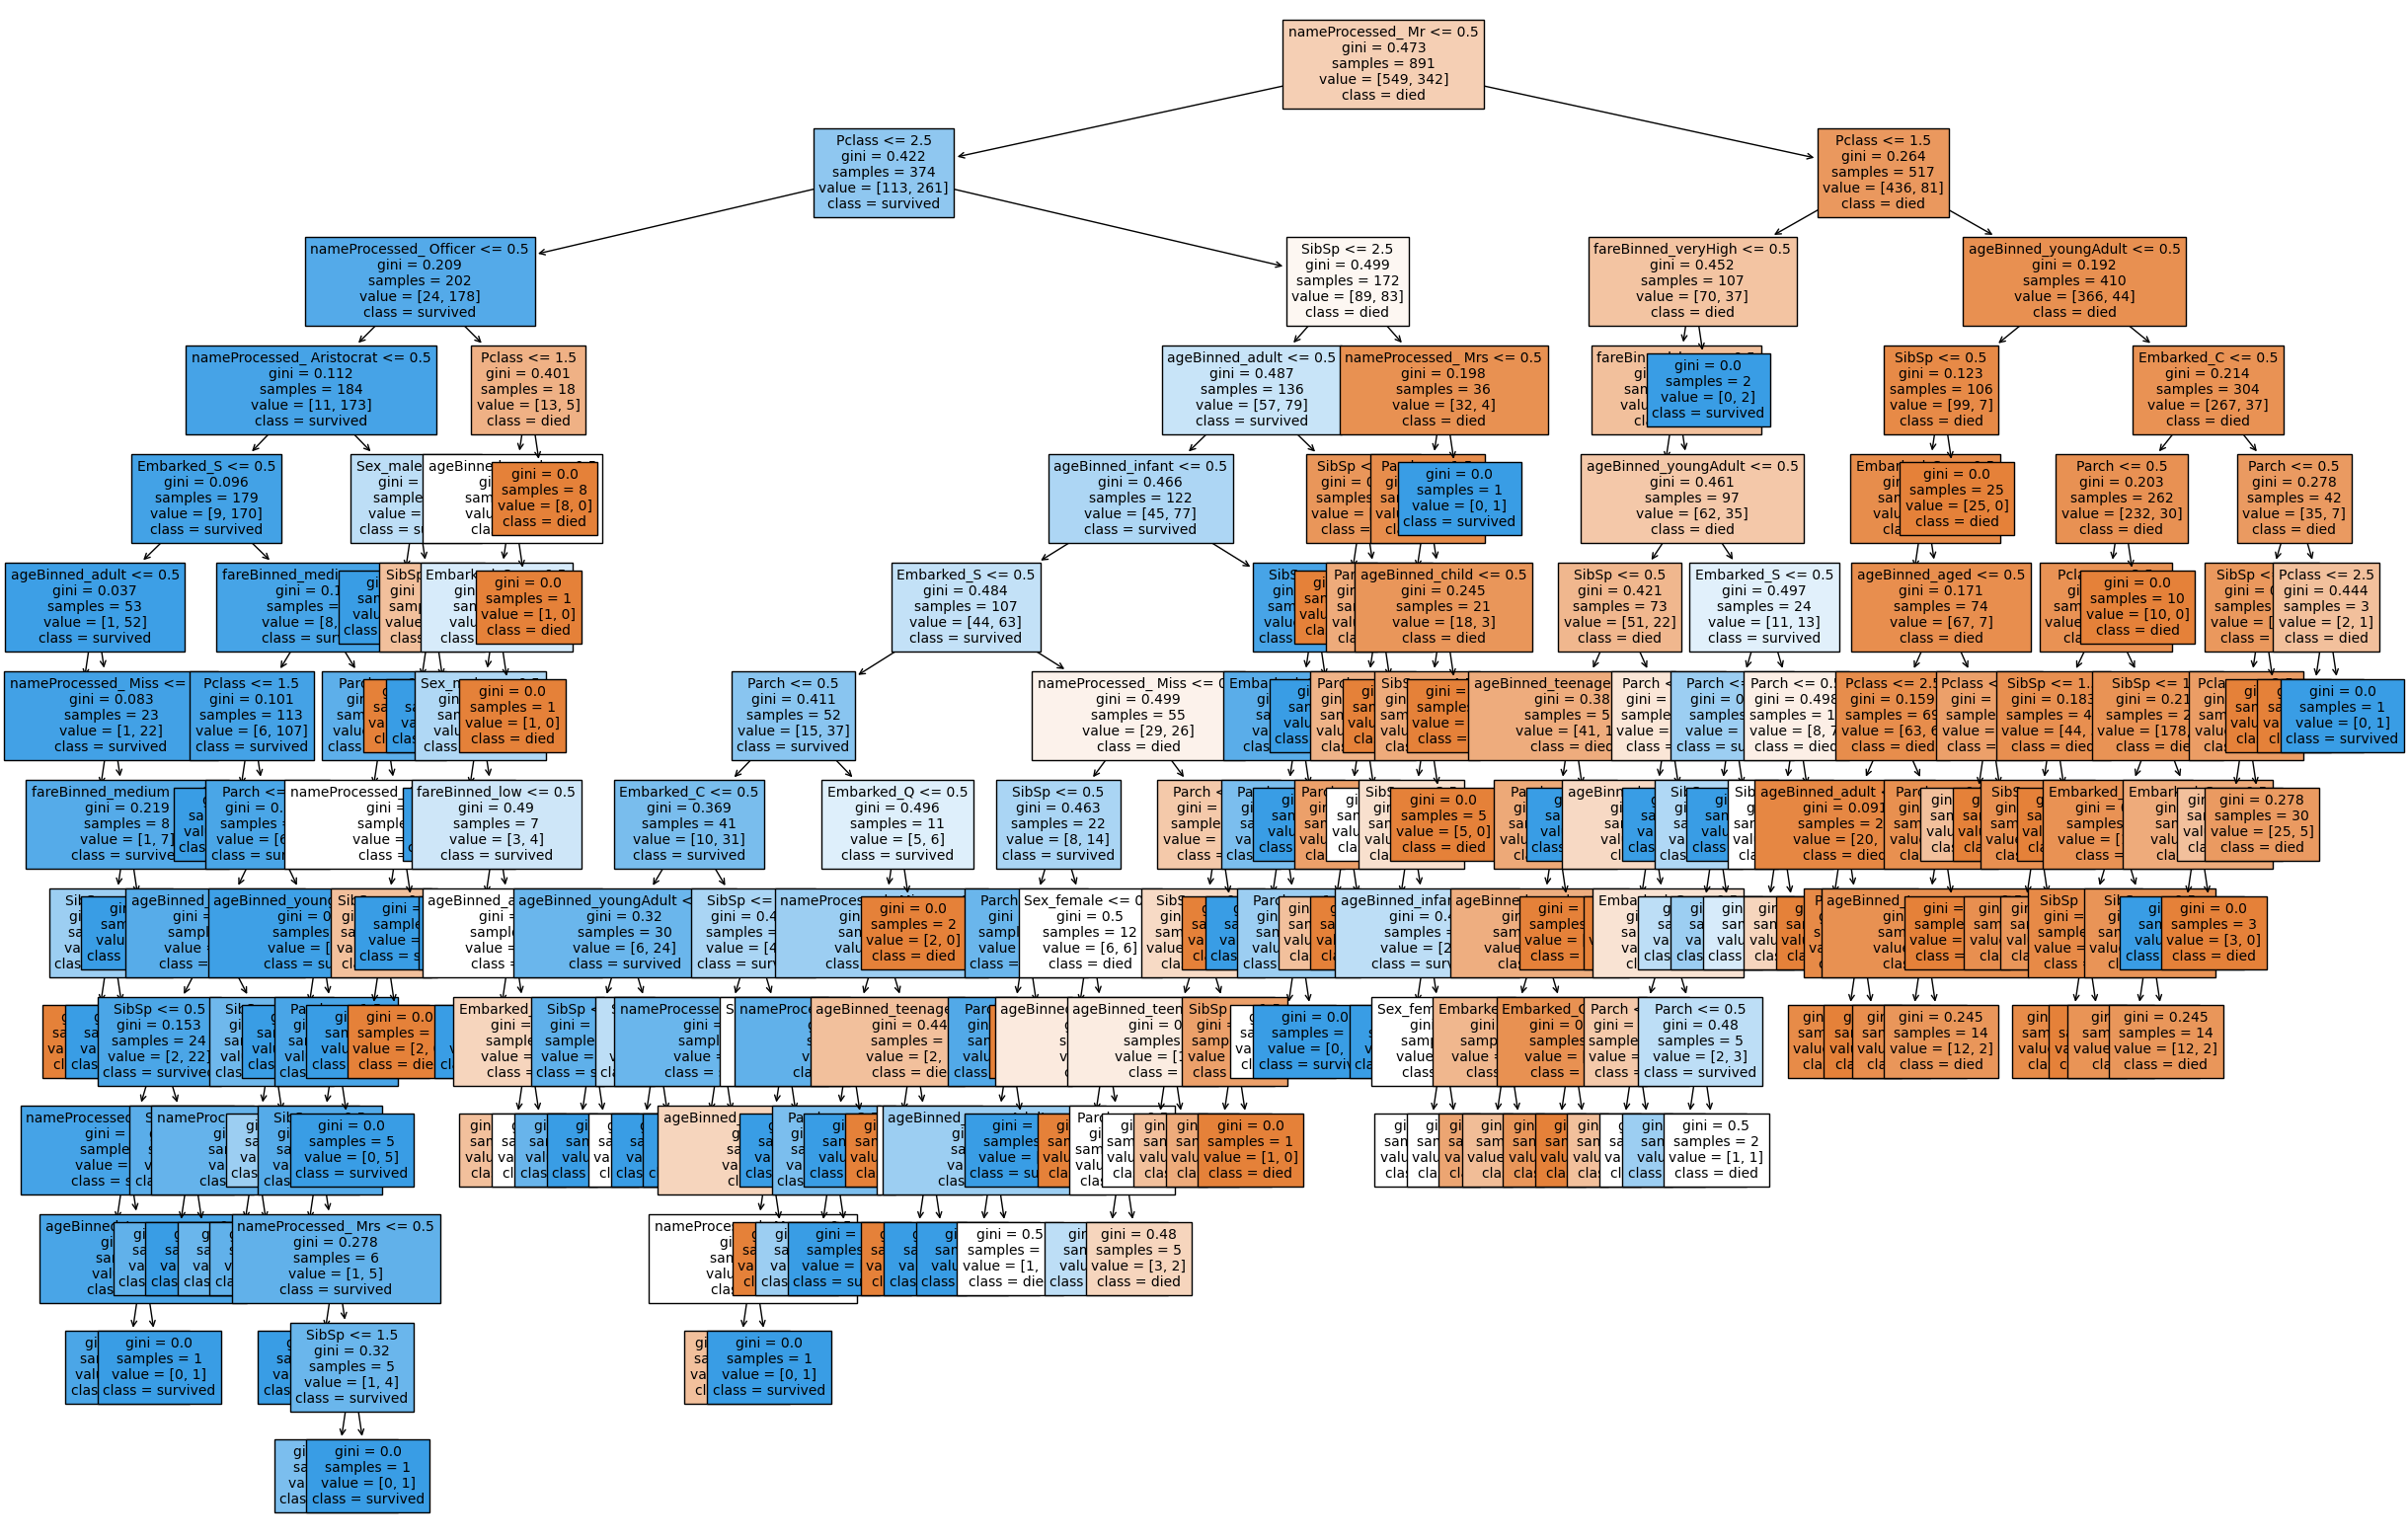

In [32]:
dt = DecisionTreeClassifier(criterion='gini',random_state = 42)
     
dt.fit(xTrain, yTrain)
plt.figure(figsize=(30,20))  
feature_names = list(xTrain.columns)
class_names = ['died','survived']
tree.plot_tree(dt, fontsize=10, filled=True,feature_names=feature_names, class_names=class_names)

In [33]:
from sklearn.model_selection import cross_val_score
     

xValScore = cross_val_score(dt, xTrain, yTrain, cv = 5, scoring="accuracy").mean()
xValScore = round(xValScore*100, 2)
print("Average classification accuracy of the trained decision tree:",xValScore)

Average classification accuracy of the trained decision tree: 79.13


In [34]:
rf = RandomForestClassifier(n_estimators = 120, random_state=42)
xValScore = cross_val_score(rf, xTrain, yTrain, cv = 5, scoring="accuracy").mean()
xValScore = round(xValScore*100, 2)
print("Average classification accuracy of the trained random forest:",xValScore)

Average classification accuracy of the trained random forest: 80.92
